In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [4]:
# var 4
random_state = 28
test_size = 0.2
np.random.seed(random_state)

In [5]:
# путь к данным нужно заменить
data = pd.read_csv("housing.csv", sep=",")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
# цель y столбец 14, "иксы" с 1 по 13
k = 13
X, y = data.drop([data.columns[k]], axis=1), data[data.columns[k]]
# конструктор признаков
poly = PolynomialFeatures(1, include_bias=False, interaction_only=True)
# делим на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [7]:
X_train

array([[4.02020e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.95210e+02, 1.03600e+01],
       [9.16400e-02, 0.00000e+00, 1.08100e+01, ..., 1.92000e+01,
        3.90910e+02, 5.52000e+00],
       [8.15174e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.08500e+01],
       ...,
       [7.97800e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.19000e+00],
       [2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [6.11540e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.89700e+02, 5.12000e+00]], shape=(404, 13))

In [8]:
# скейлер сейчас "молчит"
scale = StandardScaler()
# обучаем линейную модель (библиотечное решение)
model = LinearRegression(fit_intercept=False)
model = model.fit(X_train, y_train)
# средняя абсолютная ошибка при тестировании, коэффициент детерминации, число ненулевых
mean_absolute_error(model.predict(X_train), y_train),
mean_absolute_error(model.predict(X_test), y_test),

(3.708944058819945,)

In [9]:
# теоретически точное решение
a = np.linalg.inv((X_train.T) @ X_train) @ X_train.T @ y_train
mean_absolute_error(X_train @ a, y_train), mean_absolute_error(X_test @ a, y_test)

(3.151548949867897, 3.7089440588200087)

In [ ]:
def experiment(degree: int, use_scaler: bool, X_train, y_train, X_test, y_test) -> dict:
    poly = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    if use_scaler:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_poly)
        X_test_processed = scaler.transform(X_test_poly)
    else:
        X_train_processed = X_train_poly
        X_test_processed = X_test_poly

    # число обусловленности
    XTX = X_train_processed.T @ X_train_processed
    cond = np.linalg.cond(XTX)

    # решение системы
    try:
        a = np.linalg.inv(XTX) @ X_train_processed.T @ y_train
    except np.linalg.LinAlgError:
        a = np.linalg.pinv(XTX) @ X_train_processed.T @ y_train

    mae_train = mean_absolute_error(y_train, X_train_processed @ a)
    mae_test = mean_absolute_error(y_test, X_test_processed @ a)

    return {
        "StandardScaler": use_scaler,
        "PolynomialFeatures": degree,
        "mae_train": mae_train,
        "mae_test": mae_test,
        "cond_number": cond,
    }


results = []
digits = [1, 2, 3, 4, 5]

for degree in digits:
    for use_scaler in [True, False]:
        results.append(experiment(degree, use_scaler, X_train, y_train, X_test, y_test))

results_df = pd.DataFrame(results)
print(results_df)


   StandardScaler  PolynomialFeatures     mae_train      mae_test  \
0            True                   1     22.819802  2.257340e+01   
1           False                   1      3.151549  3.708944e+00   
2            True                   2     22.819802  2.287898e+01   
3           False                   2      1.721576  2.845394e+00   
4            True                   3     22.819802  1.125969e+07   
5           False                   3     88.689163  3.484969e+09   
6            True                   4    368.809131  1.180853e+06   
7           False                   4  24013.654912  2.546874e+14   
8            True                   5   1869.500700  7.501885e+08   
9           False                   5  20060.917055  1.097581e+14   

    cond_number  
0  9.193824e+01  
1  7.456844e+07  
2  3.863127e+08  
3  4.868097e+15  
4  8.835858e+18  
5  6.476440e+29  
6  1.520274e+19  
7  1.176258e+33  
8  4.613027e+20  
9  3.161815e+35  


In [11]:
# Почти одинаковые можно использовать только один
results_df[["mae_train", "mae_test"]].corr()

,mae_train,mae_test
mae_train,1.000000,0.948346
mae_test,0.948346,1.000000


Text(0.5, 1.0, 'scaler off')

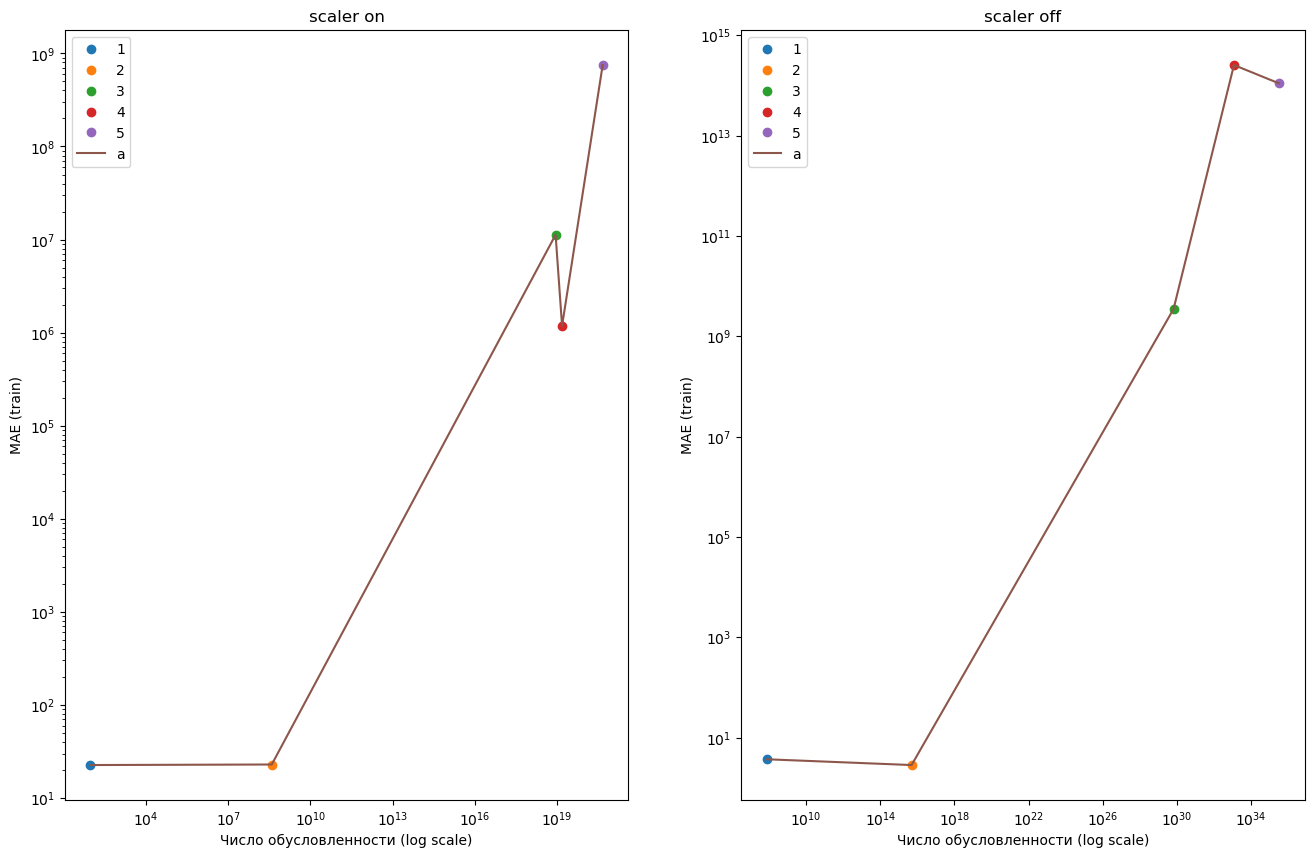

In [12]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
subset = results_df[(results_df["StandardScaler"] == True)]
for d in digits:
    subset_d = subset[subset["PolynomialFeatures"] == d]
    plt.plot(subset_d["cond_number"], subset_d["mae_test"], "o", label=f"{d}")
plt.plot(subset["cond_number"], subset["mae_test"], "-", label="a")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Число обусловленности (log scale)")
plt.ylabel("MAE (train)")
plt.legend()
plt.title("scaler on")

plt.subplot(122)
subset = results_df[(results_df["StandardScaler"] == False)]
for d in digits:
    subset_d = subset[subset["PolynomialFeatures"] == d]
    plt.plot(subset_d["cond_number"], subset_d["mae_test"], "o", label=f"{d}")
plt.plot(subset["cond_number"], subset["mae_test"], "-", label="a")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Число обусловленности (log scale)")
plt.ylabel("MAE (train)")
plt.legend()
plt.title("scaler off")